In [55]:
import pandas as pd
import numpy as np

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Cleaning and Preprocessing
df = pd.read_csv("data/labeled_data.csv")
df.columns.tolist()
features = [
    'Households Served',
    'Pounds of Food Distributed',
    'Pop2010',
    'TractLOWI',
    'PovertyRate',
    'Urban',
    'MedianFamilyIncome',
    'lapophalf',
    'lapop1',
    'lapop10'
]
X = df[features]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

model = Sequential([
    Dense(20, activation="elu", kernel_initializer="he_normal"),
    Dropout(0.2),
    Dense(10, activation="elu", kernel_initializer="he_normal"),
    Dropout(0.2),
    Dense(5, activation="elu", kernel_initializer="he_normal"),
    Dropout(0.2),
    Dense(y.nunique(), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100,
          validation_data=(X_val, y_val),
          callbacks=EarlyStopping(patience=5))

Epoch 1/100
3/3 [==============================] - 2s 221ms/step - loss: 1.6857 - accuracy: 0.2805 - val_loss: 1.0035 - val_accuracy: 0.3810
Epoch 2/100
3/3 [==============================] - 0s 71ms/step - loss: 1.3928 - accuracy: 0.3293 - val_loss: 0.9839 - val_accuracy: 0.3810
Epoch 3/100
3/3 [==============================] - 0s 69ms/step - loss: 1.5835 - accuracy: 0.2561 - val_loss: 0.9636 - val_accuracy: 0.3810
Epoch 4/100
3/3 [==============================] - 0s 53ms/step - loss: 1.5169 - accuracy: 0.2683 - val_loss: 0.9414 - val_accuracy: 0.3810
Epoch 5/100
3/3 [==============================] - 0s 63ms/step - loss: 1.4277 - accuracy: 0.3049 - val_loss: 0.9154 - val_accuracy: 0.3810
Epoch 6/100
3/3 [==============================] - 0s 45ms/step - loss: 1.4292 - accuracy: 0.2683 - val_loss: 0.8891 - val_accuracy: 0.3810
Epoch 7/100
3/3 [==============================] - 0s 47ms/step - loss: 1.2338 - accuracy: 0.3780 - val_loss: 0.8637 - val_accuracy: 0.4762
Epoch 8/100
3/3 [==

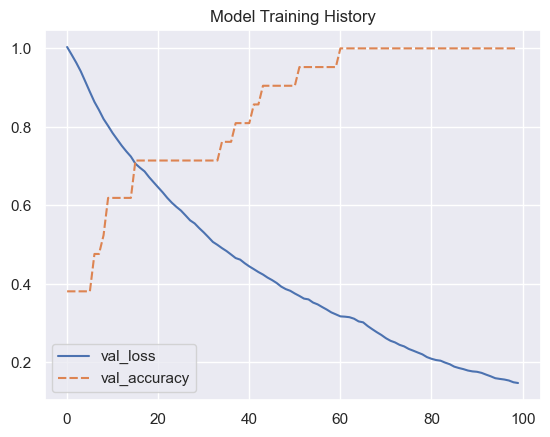

1/1 [==============================] - 0s 65ms/step - loss: 0.1510 - accuracy: 1.0000


[0.1509844958782196, 1.0]

<Figure size 640x480 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

hist = history.history.copy()
hist.pop('loss')
hist.pop('accuracy')

fig, ax = plt.subplots()
sns.lineplot(
    data=hist, ax=ax
)
ax.set_title('Model Training History')
plt.show()
plt.savefig('images/training_hist.png')

model.evaluate(X_test, y_test)